<a href="https://colab.research.google.com/github/maulanareza-13/Teknologi-Data/blob/main/Uas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Percobaan pertama
import pandas as pd
# sub 1
df = pd.read_csv('/content/drive/MyDrive/CO2.csv')
df.head(10)
# sub 2
df.describe()
#sub 3
df.drop(['Make','Model','Vehicle Class','Transmission','Fuel Type'], axis = 1, inplace = True)

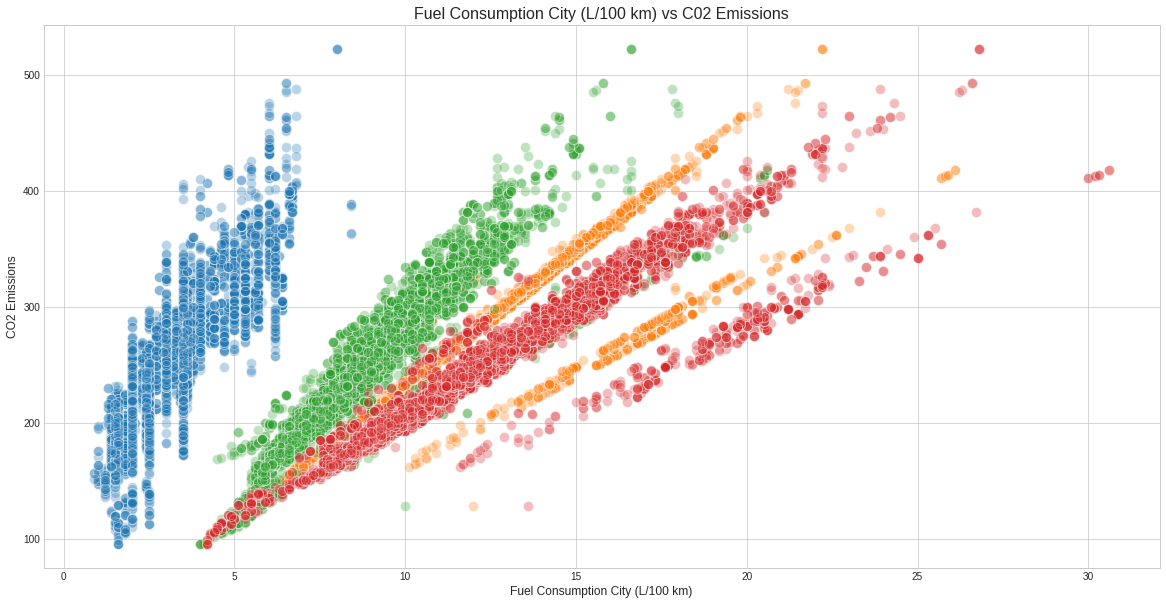

In [3]:
#Percobaan kedua
# sub 1
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

# sub 2 menampilkan semua hasil
# sb.pairplot(df)
# plt.savefig('pairplor.png')

# (i) Engine size / CO2 emissions:
plt.scatter(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Engine size vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Engine Size', fontsize = 12)

plt.savefig('enginesize_co2.png')

# (ii) Fuel Consumption Comb (L/100 km) / C02 emissions:
plt.scatter(x = 'Fuel Consumption Comb (L/100 km)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Fuel Consumption Comb (L/100 km) vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize = 12)

plt.savefig('fcc_co2')

# (iii) Fuel Consumption Hwy (L/100 km) / CO2 emissions:
plt.scatter(x = 'Fuel Consumption Hwy (L/100 km)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Fuel Consumption Hwy (L/100 km) vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize = 12)

plt.savefig('fch_co2.png')

#(iv) Fuel Consumption City (L/100 km) / CO2 Emissions:
plt.scatter(x = 'Fuel Consumption City (L/100 km)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Fuel Consumption City (L/100 km) vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize = 12)

plt.savefig('fccity_co2.png')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


R-Squared : 0.7162770226132333


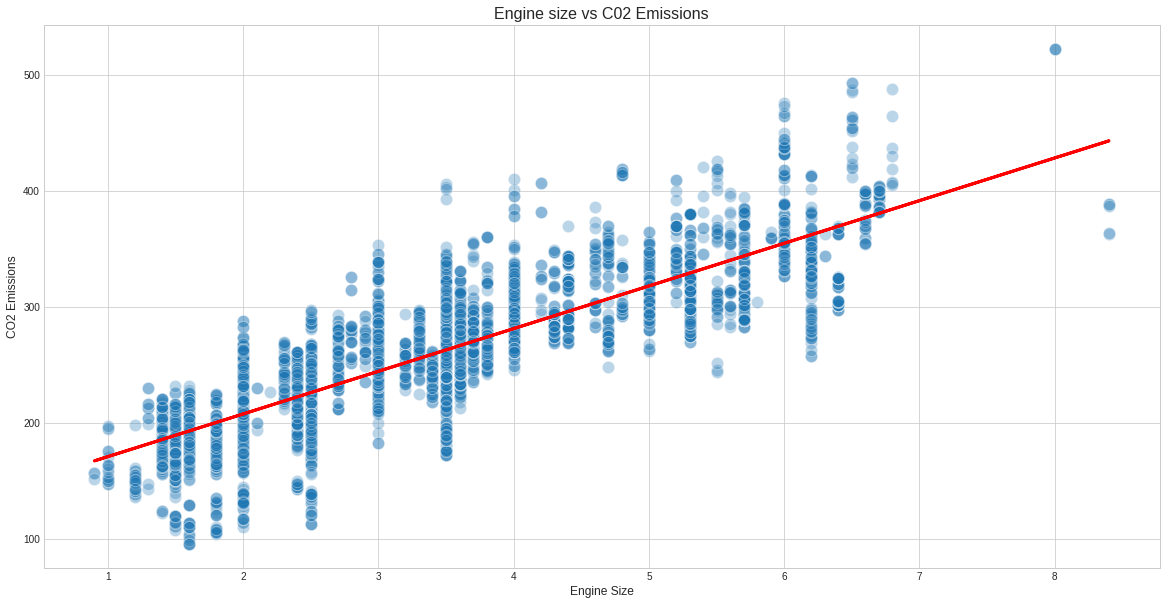

In [4]:
# SLR Model
X_var = df[['Engine Size(L)']] # independent variable
y_var = df['CO2 Emissions(g/km)'] # dependent variable

# (i) Statsmodels:
import statsmodels.api as sm
from termcolor import colored as cl

slr_model = sm.OLS(y_var, X_var) # Ordinary Least Squares 
slr_reg = slr_model.fit()

slr_reg.summary()

# (ii) Scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['Engine Size(L)'], slr_slope*df['Engine Size(L)'] + slr_intercept, color = 'r', linewidth = 3)
plt.title('Engine size vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Engine Size', fontsize = 12)

plt.savefig('enginesize_co2_fit.png')

print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.874
Model:                             OLS   Adj. R-squared:                  0.874
Method:                  Least Squares   F-statistic:                 1.276e+04
Date:                 Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                         12:30:19   Log-Likelihood:                -32890.
No. Observations:                 7385   AIC:                         6.579e+04
Df Residuals:                     7380   BIC:                         6.582e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


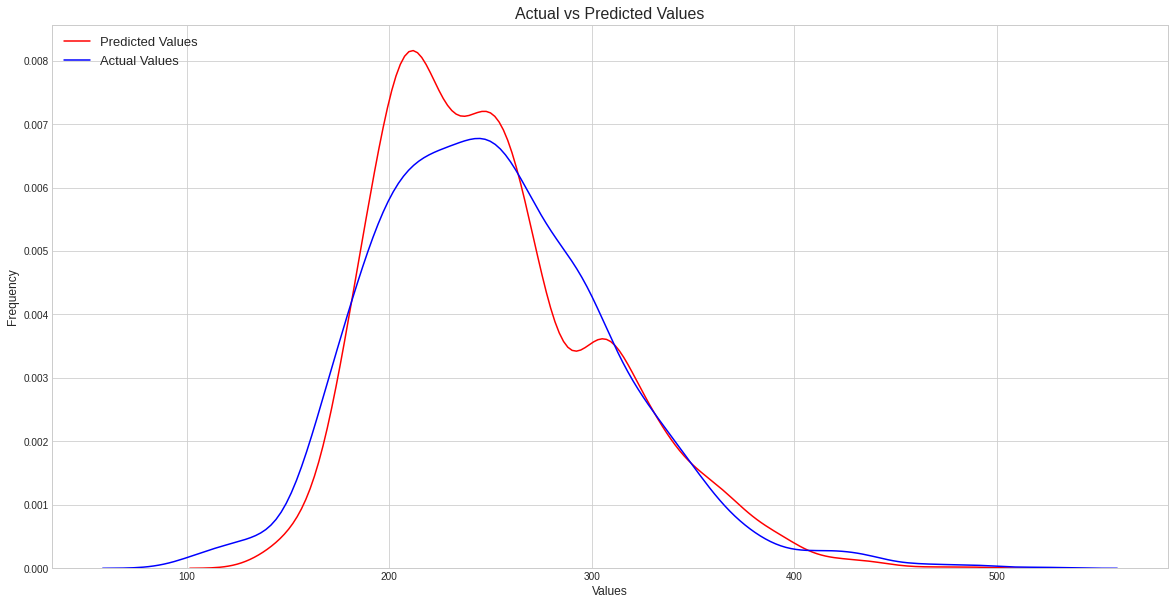

In [5]:
# MLR Model
X1_var = df[['Engine Size(L)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption City (L/100 km)']]
y_var = df['CO2 Emissions(g/km)'] # dependent variable

# (i) Statsmodels 
sm_X1_var = sm.add_constant(X1_var)

mlr_model = sm.OLS(y_var, sm_X1_var)
mlr_reg = mlr_model.fit()

print(cl(mlr_reg.summary(), attrs = ['bold']))

#(ii) Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X1_var, y_var, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

# Memvisualisasikan Akurasi Prediksi
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')